In [50]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step-1: Load Dataset

In [5]:
faces = fetch_olivetti_faces()

In [39]:
samples, height, width = faces.images.shape
X = faces.data
features = X.shape[1]
y = faces.target
classes = int(max(y)+1)

print("Samples: ", samples)
print("Height: ", height)
print("Width: ", width)
print("Features: ", features)
print("Classes: ", classes)

Samples:  400
Height:  64
Width:  64
Features:  4096
Classes:  40


## Step-2: Splitting Dataset

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

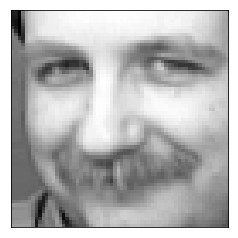

In [41]:
image = X_train[0]
plt.imshow(image.reshape((64,64)), cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()

## Step-3: Visualize

In [42]:
def plot_gallery(images, h, w, titles=None, n_row=2, n_col=5):
    
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(n_row * n_col):
        
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap='gray')
        
        if titles != None:
            plt.title(titles[i], size=12)
        
        plt.xticks(())
        plt.yticks(())

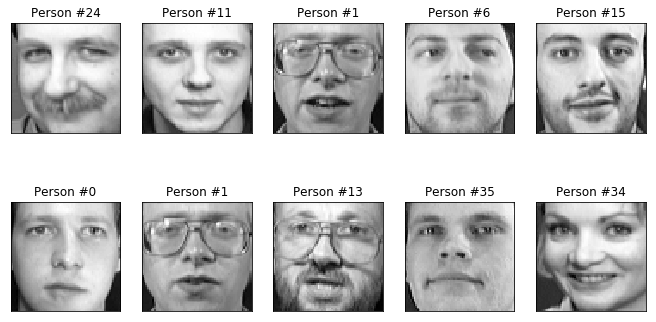

In [43]:
images = X_train[:10]
labels = y_train[:10]
titles = ['Person #' + str(i) for i in labels]

plot_gallery(images, height, width, titles)

## Step-4: Eigen Value Calculation

In [44]:
components = 150
pca = PCA(n_components=components, svd_solver='randomized').fit(X_train)
eigenfaces = pca.components_.reshape((components, height, width))

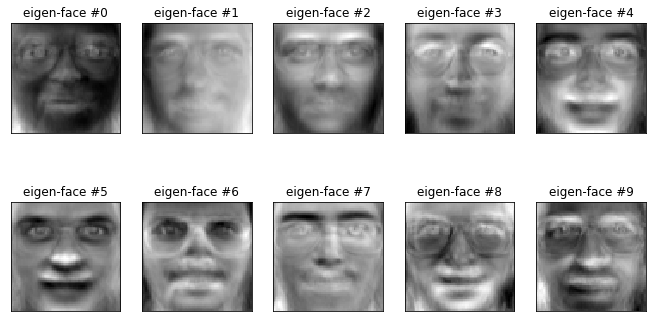

In [45]:
titles = ['eigen-face #' + str(i) for i in range(10)]
plot_gallery(eigenfaces, height, width, titles)

## Step-5: Vector Space Transformation

In [46]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Current shape of input data matrix: ", X_train_pca.shape)

Current shape of input data matrix:  (300, 150)


## Step-6: KNN Classification

In [47]:
classifier = KNeighborsClassifier(n_neighbors = 5).fit(X_train_pca, y_train)

y_pred_test = classifier.predict(X_test_pca)
correct_count = 0.0

for i in range(len(y_test)):
    if y_pred_test[i] == y_test[i]:
        correct_count += 1.0
        
accuracy = correct_count / float(len(y_test))

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test, labels=range(classes)))

Accuracy: 0.83
             precision    recall  f1-score   support

          0       0.50      0.50      0.50         4
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         2
          3       0.60      0.75      0.67         4
          4       0.75      1.00      0.86         3
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         1
          7       1.00      0.71      0.83         7
          8       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         3
         10       1.00      1.00      1.00         3
         11       1.00      0.75      0.86         4
         12       0.67      1.00      0.80         2
         13       1.00      1.00      1.00         1
         14       0.75      1.00      0.86         3
         15       1.00      0.50      0.67         2
         16       0.00      0.00      0.00         0
         17       0.75      1.

C:\Users\Rafsanjani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rafsanjani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


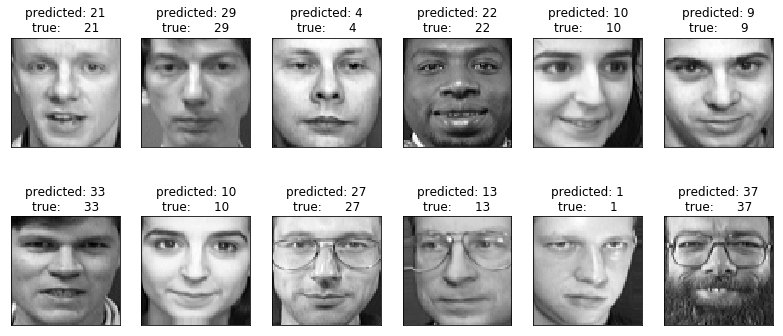

In [48]:
def titles(y_pred, y_test, target_names, i):
    
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

target_names = [str(element) for element in np.arange(40) + 1]
prediction_titles = [titles(y_pred_test, y_test, target_names, i) for i in range(y_pred_test.shape[0])]
plot_gallery(X_test, height, width, prediction_titles, n_row=2, n_col=6)
plt.show()